In [1]:
from jupyter_notebook_mcp.jupyter_ws_server import setup_jupyter_mcp_integration
setup_jupyter_mcp_integration();

Loaded client.js from C:\Users\jjsan\GitHub\jupyter-notebook-mcp\src\jupyter_notebook_mcp\client.js
WebSocket server started on ws://localhost:8765


Jupyter client connected
Jupyter client connected


# Data Visualization with Seaborn
## A Powerful Library for Statistical Graphics in Python

# What is Seaborn?

- A statistical visualization library built on top of Matplotlib
- Created by Michael Waskom in 2012
- Provides a high-level interface for drawing attractive statistical graphics
- Designed specifically for statistical data exploration and visualization
- Integrates closely with pandas DataFrames

<Figure size 800x400 with 0 Axes>

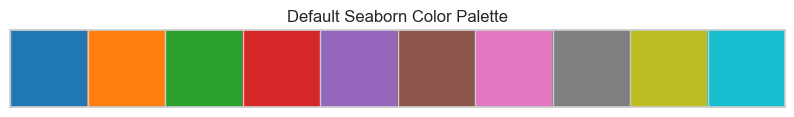

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for all plots
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.palplot(sns.color_palette("tab10"))
plt.title("Default Seaborn Color Palette");

# Long vs. Wide Data Format

## Wide Format
- Each variable has its own column
- Each row represents a single observational unit
- Common in spreadsheets and traditional data entry

## Long Format (Tidy Data)
- Each row is a single observation
- Each column is a variable
- Each cell is a single value
- Preferred for statistical analysis and visualization in Seaborn

In [3]:
# Create a simple wide-format dataset
wide_data = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie'],
    'math': [90, 85, 70],
    'science': [95, 80, 75],
    'history': [80, 90, 85]
})

print("Wide Format:")
display(wide_data)

Wide Format:


,student,math,science,history
0,Alice,90,95,80
1,Bob,85,80,90
2,Charlie,70,75,85


In [4]:
# Convert to long format
long_data = wide_data.melt(id_vars=['student'], 
                          var_name='subject', 
                          value_name='score')

print("Long Format (preferred for Seaborn):")
display(long_data)

Long Format (preferred for Seaborn):


,student,subject,score
0,Alice,math,90
1,Bob,math,85
2,Charlie,math,70
3,Alice,science,95
4,Bob,science,80
5,Charlie,science,75
6,Alice,history,80
7,Bob,history,90
8,Charlie,history,85


# Advantages of Seaborn over Matplotlib

- **Simplified API**: Fewer lines of code for complex visualizations
- **Statistical Integration**: Built-in statistical estimation and visualization
- **Beautiful Defaults**: Aesthetically pleasing default styles and color palettes
- **DataFrame Integration**: Works directly with pandas DataFrames
- **High-Level Functions**: Specialized plots like violin plots, swarm plots
- **Figure-Level vs. Axes-Level**: Both approaches supported
- **Themes and Styles**: Easily customizable visual aesthetics

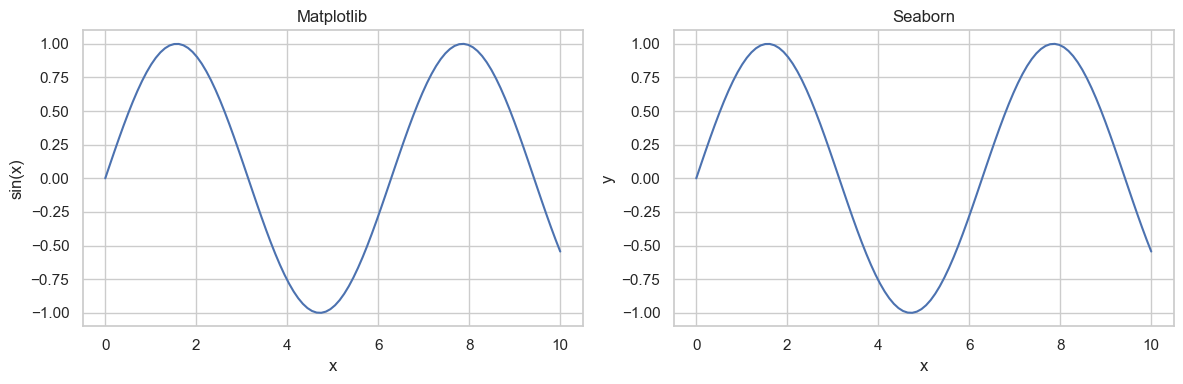

In [5]:
# Create sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)
df = pd.DataFrame({'x': x, 'y': y})

# Matplotlib vs Seaborn comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Matplotlib plot
ax1.plot(x, y)
ax1.set_title('Matplotlib')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')

# Seaborn plot
sns.lineplot(data=df, x='x', y='y', ax=ax2)
ax2.set_title('Seaborn')

plt.tight_layout()
plt.show()

# Commonly Used Seaborn Functions

## Relational Plots
- `scatterplot()`: Show relationship between two variables
- `lineplot()`: Show trends over a continuous variable

## Categorical Plots
- `barplot()`: Show point estimates and confidence intervals
- `boxplot()`: Show distributions with quartiles and outliers
- `violinplot()`: Show distributions with kernel density estimation
- `swarmplot()`: Show all observations with no overlapping points

## Distribution Plots
- `histplot()`: Show univariate or bivariate distributions
- `kdeplot()`: Show estimated probability density functions
- `jointplot()`: Show bivariate distributions with marginals

## Matrix Plots
- `heatmap()`: Show 2D matrix data with color encoding

In [6]:
# Create a more robust dataset for our examples
np.random.seed(42)
n = 100

# Generate sample data
df = pd.DataFrame({
    'group': np.random.choice(['A', 'B', 'C', 'D'], size=n),
    'value': np.random.normal(loc=5, scale=2, size=n),
    'category': np.random.choice(['Category 1', 'Category 2'], size=n),
    'x': np.random.uniform(0, 10, size=n),
    'y': np.random.uniform(0, 10, size=n),
})

# Display first few rows
df.head()

,group,value,category,x,y
0,C,6.476933,Category 2,2.807724,8.554606
1,D,5.342737,Category 2,0.243160,7.036579
2,A,4.768703,Category 1,6.454723,4.741738
3,C,4.397793,Category 2,1.771107,0.978342
4,C,2.042956,Category 2,9.404586,4.916159


# Live Demonstration: Seaborn vs. Matplotlib

Let's compare how to create common plots using both libraries:
- Bar plots
- Line plots
- Scatter plots

We'll see how Seaborn simplifies code while providing more attractive defaults.

# Bar Plots

Bar plots show the relationship between a categorical and a numeric variable, typically showing means/counts and (optionally) confidence intervals.

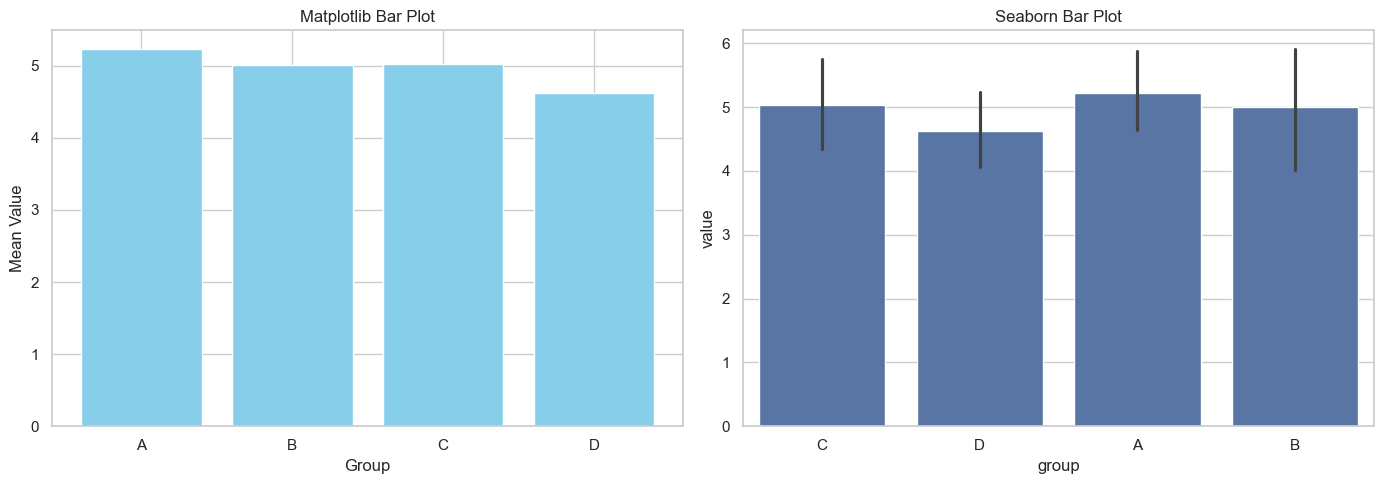

In [7]:
# Bar plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Calculate means for Matplotlib
means = df.groupby('group')['value'].mean()

# Matplotlib bar plot
ax1.bar(means.index, means.values, color='skyblue')
ax1.set_title('Matplotlib Bar Plot')
ax1.set_xlabel('Group')
ax1.set_ylabel('Mean Value')

# Seaborn bar plot (automatically calculates mean and CI)
sns.barplot(data=df, x='group', y='value', ax=ax2)
ax2.set_title('Seaborn Bar Plot')

plt.tight_layout()
plt.show()

# Line Plots

Line plots show the relationship between two numeric variables, especially useful for time series or trends.

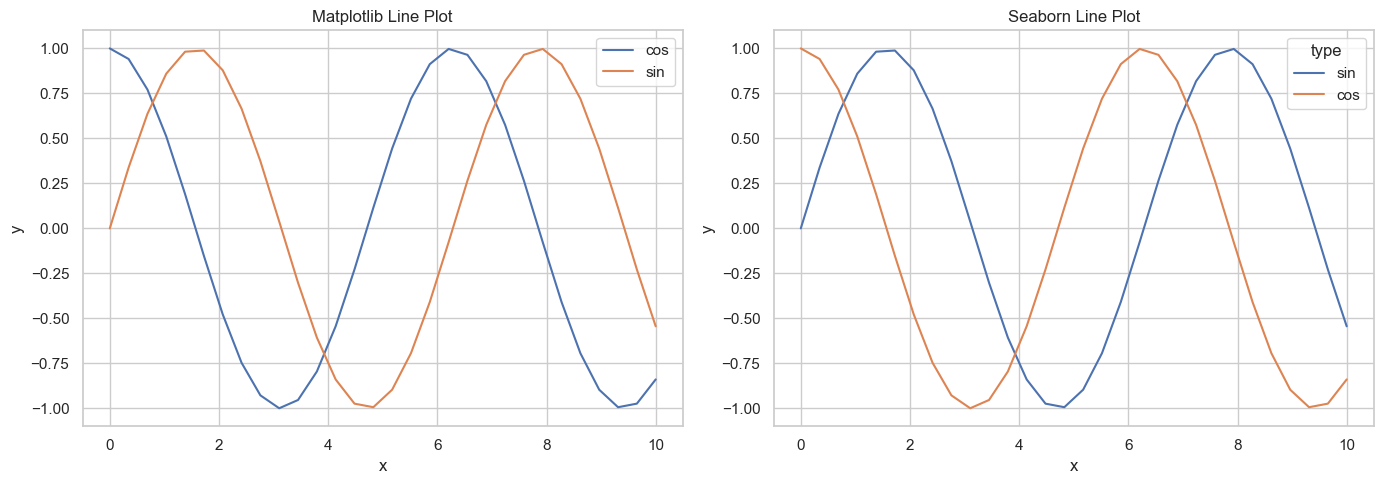

In [9]:
# Create ordered data for line plots
x = np.linspace(0, 10, 30)
y1 = np.sin(x)
y2 = np.cos(x)
line_df = pd.DataFrame({
    'x': np.concatenate([x, x]),
    'y': np.concatenate([y1, y2]),
    'type': ['sin']*30 + ['cos']*30
})

# Set up the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Matplotlib line plot
for line_type, group in line_df.groupby('type'):
    ax1.plot(group['x'], group['y'], label=line_type)
ax1.legend()
ax1.set_title('Matplotlib Line Plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Seaborn line plot
sns.lineplot(data=line_df, x='x', y='y', hue='type', ax=ax2)
ax2.set_title('Seaborn Line Plot')

plt.tight_layout()
plt.show()

# Scatter Plots

Scatter plots show the relationship between two numeric variables using dots to represent individual data points.

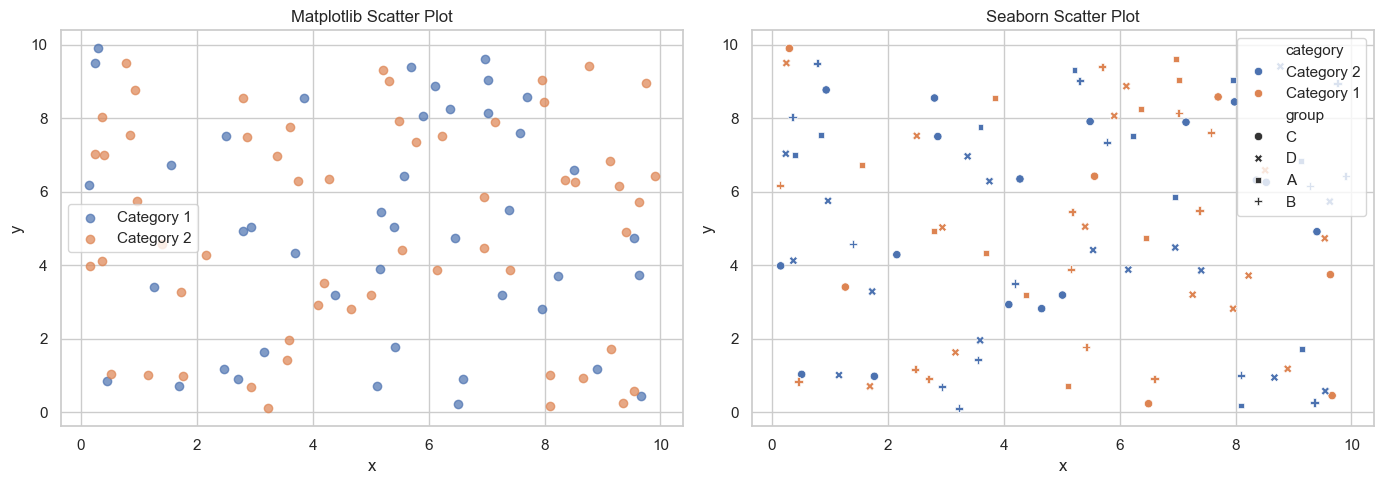

In [10]:
# Scatter plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Matplotlib scatter plot
for category, group in df.groupby('category'):
    ax1.scatter(group['x'], group['y'], label=category, alpha=0.7)
ax1.legend()
ax1.set_title('Matplotlib Scatter Plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Seaborn scatter plot
sns.scatterplot(data=df, x='x', y='y', hue='category', style='group', ax=ax2)
ax2.set_title('Seaborn Scatter Plot')

plt.tight_layout()
plt.show()

# Summary

## Key Takeaways

- **Seaborn simplifies visualization code** while providing better defaults
- **Statistical integration** is seamless (confidence intervals, etc.)
- **Working with pandas** is more natural in Seaborn
- **Beautiful aesthetics** with minimal effort
- **Long-format data** works best with Seaborn
- **For complex customization**, you can always fall back to Matplotlib

## Resources
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Matplotlib + Seaborn Examples](https://seaborn.pydata.org/examples/index.html)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)

# Thank You!

Questions?